In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import bench
import display

from string import digits
from os import listdir
from os.path import isfile, join, getsize

%load_ext autoreload
%autoreload 2

onlyfiles = [f for f in listdir('out/') if isfile(join('out/', f))]
app_grid = [f for f in onlyfiles if re.search('app_grid',f)]
app_grid.append("app_grid_3layers_reference.txt")
app_grid.append("app_grid_4layers_reference.txt")

cs_grid = [f for f in onlyfiles if re.search('cs_grid',f)]

In [2]:
app = bench.AppDelay([f"out/{i}" for i in app_grid])
print(app.data_.columns)
app.data_

Index(['Time', 'Node', 'AppId', 'SeqNo', 'Type', 'DelayS', 'DelayUS',
       'RetxCount', 'HopCount', 'source', 'NodeType', 'NodeNumber', 'Cache',
       'CacheCapacity', 'CacheStrategy', 'Layers'],
      dtype='object')


,Time,Node,AppId,SeqNo,Type,DelayS,DelayUS,RetxCount,HopCount,source,NodeType,NodeNumber,Cache,CacheCapacity,CacheStrategy,Layers
0,2.05340,csm1,0,5,Last,0.003397,3396.58,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
1,2.05340,csm1,0,5,Full,0.003397,3396.58,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
2,2.15167,csm1,0,15,Last,0.001672,1671.56,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
3,2.15167,csm1,0,15,Full,0.001672,1671.56,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
4,2.55205,csm1,0,50,Last,0.002046,2045.95,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,14.76830,csm13,0,17,Full,0.201671,201671.00,1,1.0,app_grid_3layers_fifo_15.txt,csm,13,fifo,15,everywhere,3
410,14.76830,csm9,0,17,Last,0.001671,1670.72,1,1.0,app_grid_3layers_fifo_15.txt,csm,9,fifo,15,everywhere,3
411,14.76830,csm9,0,17,Full,4.101670,4101670.00,5,1.0,app_grid_3layers_fifo_15.txt,csm,9,fifo,15,everywhere,3
412,14.85340,csm11,0,25,Last,1.586780,1586780.00,1,1.0,app_grid_3layers_fifo_15.txt,csm,11,fifo,15,everywhere,3


In [26]:
app.data_["Interval"] = app.data_["Time"] // 1

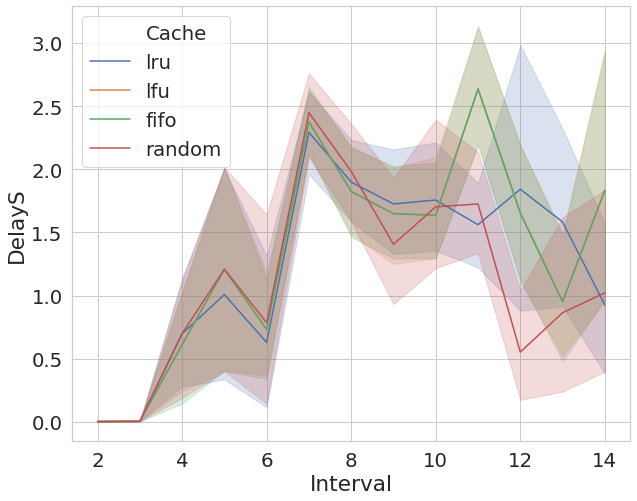

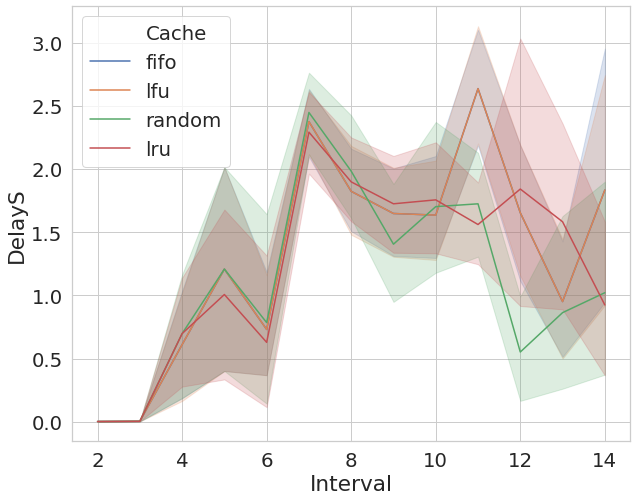

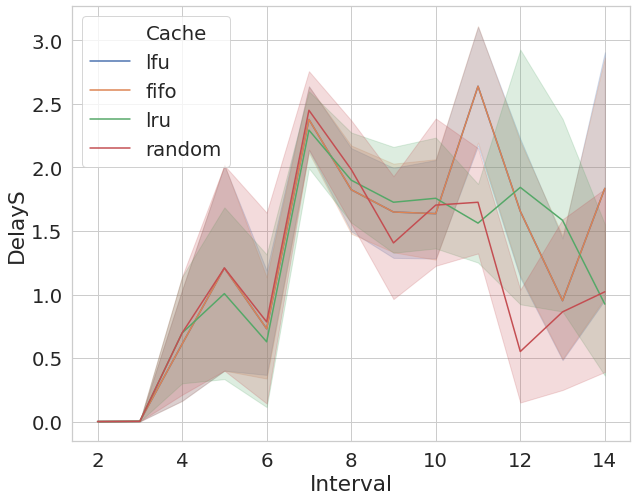

In [27]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["CacheStrategy"] == "everywhere") &
    (app.data_["Type"] == "Full") 
])
plt.show()

plt.figure(figsize=(10,8))
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["CacheStrategy"] == "frontier") &
    (app.data_["Type"] == "Full")
])
plt.show()

plt.figure(figsize=(10,8))
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["CacheStrategy"] == "fog") &
    (app.data_["Type"] == "Full")
])
plt.show()
